In [76]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from models.SVM import *
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import model_selection, metrics

# generate samples

In [11]:
N = 500
x1 = list(np.random.rand(500))
x2 = list(np.random.rand(500))
y = list(np.zeros(500))

In [15]:
data = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

In [17]:
data.loc[data.x1.values+data.x2.values>1.3, 'y'] = 1
data.loc[data.x1.values+data.x2.values<0.7, 'y'] = -1

In [23]:
data1 = data.loc[data.y.values==1]
data2 = data.loc[data.y.values==-1]
data3 = pd.concat([data1, data2], axis=0)

In [82]:
plt.figure(figsize=(8,4))

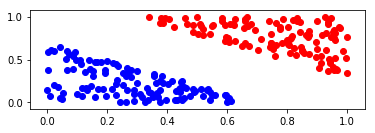

In [90]:
plt.subplot(2,1,1)
plt.scatter(data1.x1, data1.x2, c='r')
plt.scatter(data2.x1, data2.x2, c='b')

# svm model use two approach

In [92]:
clf = SVC(kernel='linear', C=100000)
clf.fit(data3[['x1', 'x2']], data3['y'])

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [98]:
X_train = np.mat(data3[['x1','x2']])
(m,p) = X_train.shape
y_train = np.mat(data3['y']).reshape((m,1))

In [109]:
result = SMO(X_train,y_train)
w, b = result['w'], result['intercept']

In [113]:
result.keys()

dict_keys(['alpha', 'w', 'intercept'])

In [116]:
x_min, x_max = min(X[:,0])[0,0], max(X[:,0])[0,0]
y_min, y_max = -b/w[1] - w[0]/w[1]*x_min,  -b/w[1] - w[0]/w[1]*x_max
y_min2, y_max2 = -clf.intercept_[0]/clf.coef_[0,1] - clf.coef_[0,0]/clf.coef_[0,1]*x_min,  -clf.intercept_[0]/clf.coef_[0,1] - clf.coef_[0,0]/clf.coef_[0,1]*x_max
y_min, y_max = y_min[0,0], y_max[0,0]
plt.plot([x_min,x_max],[y_min,y_max])
plt.plot([x_min,x_max],[y_min2,y_max2])


matrix([[3.29734234],
        [3.26779736]])

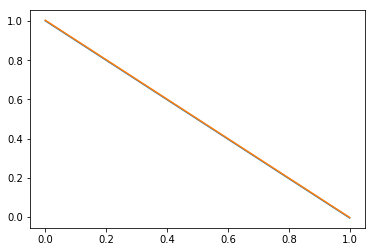

In [122]:
x_min, x_max = min(X_train[:,0])[0,0], max(X_train[:,0])[0,0]
y_min, y_max = -b/w[1] - w[0]/w[1]*x_min,  -b/w[1] - w[0]/w[1]*x_max
y_min2, y_max2 = -clf.intercept_[0]/clf.coef_[0,1] - clf.coef_[0,0]/clf.coef_[0,1]*x_min,  -clf.intercept_[0]/clf.coef_[0,1] - clf.coef_[0,0]/clf.coef_[0,1]*x_max
y_min, y_max = y_min[0,0], y_max[0,0]
plt.plot([x_min,x_max],[y_min,y_max])
plt.plot([x_min,x_max],[y_min2,y_max2])

# use fraud data to svm model

In [45]:
from featureProcess.DataGenerator import *
import random
from sklearn.linear_model import RandomizedLogisticRegression, LogisticRegression

In [5]:
data_dict = DataGenerator().get_logistic_regression_data()

overall fraud rate on train set is 1.0735%
Constant columns: ['ip_desc_danger']
                    not_missing   missing  odds_ratio
area1_danger           0.010616  0.400000    3.629075
60d_pay_times          0.003270  0.017471    1.675847
60d_Sum_pay_amount     0.003270  0.017471    1.675847
is_email_acct          0.007191  0.036644    1.628485
15d_Min_pay_amount     0.002972  0.015066    1.623247


/Users/jielv/machine_learning/FintechAntiFraud/featureProcess/FeatureStandard.py:71: RuntimeWarning: divide by zero encountered in log
  lower_log_odds, upper_log_odds = np.log(l), np.log(u)


outlier_fraud odds ratio
                         log_odds_lower  log_odds_upper
12h_sign_bank_cnt                   0.0        1.480589
1h_sign_bank_cnt                    0.0        0.847014
24h_AcctPerIP                       0.0        0.376279
24h_sign_bank_cnt                   0.0        0.847014
30m_1h_payment_increase             0.0        0.329647
overall fraud rate on test set is 1.1920%


In [6]:
train_data = pd.concat([data_dict['train_X'], data_dict['train_y']], axis=1)
test_data = pd.concat([data_dict['test_X'], data_dict['test_y']], axis=1)
all_features = list(train_data.columns)
all_features.remove('flag')

/Users/jielv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1788dfd0>,
      dtype=object)

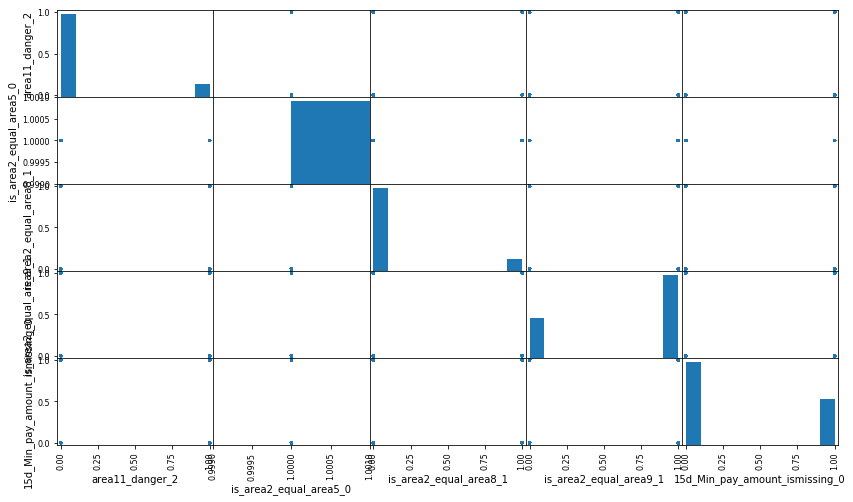

In [7]:
sample_features = random.sample(all_features, 5)
pd.scatter_matrix(train_data[sample_features], alpha = 0.3, figsize = (14,8), diagonal = 'hist')

# check imbalance rate

In [10]:
check_imbalance = np.mean(train_data['flag'])   
check_imbalance

0.01073470380732271

In [11]:
good_samples, bad_samples = train_data[train_data['flag'] == 0], train_data[train_data['flag'] == 1]

# select 5:1 ratio good samples to bad samples from train data set

In [17]:
good_samples_2 = good_samples.sample(bad_samples.shape[0] * 5)
train_data_2 = pd.concat([good_samples_2, bad_samples])
print(np.mean(train_data_2['flag'])) 

0.16666666666666666


In [20]:
X, y = np.mat(train_data_2[all_features]), np.mat(train_data_2['flag']).T

In [28]:
features_std = np.std(X, axis=0).getA()[0]
features_std_sorted = sorted(features_std, reverse=True)

In [32]:
len(features_std_sorted)

243

<Container object of 9 artists>

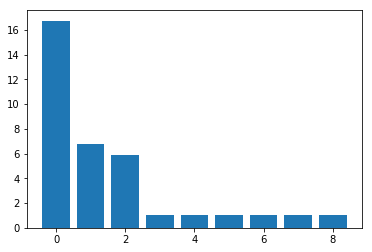

In [42]:
plt.bar(x=range(len(features_std_sorted[1:10])), height=features_std_sorted[1:10])

# only select std greater than 0.5

In [43]:
large_std_features_index = [i for i in range(len(features_std)) if features_std[i]>0.5]
X2 = X[:,large_std_features_index]

In [80]:
auc_list = []
for Ci in list(range(1,101)):
    X21, X22, y21,y22 = model_selection.train_test_split(X2,y,test_size=0.2)
    # 可在此步对模型进行参数设置
    lr = RandomizedLogisticRegression(C=Ci)       
    lr.fit(X21, y21) 
    X_new = lr.inverse_transform(lr.fit_transform(X21,y21))
    X3 = X21[:, X_new.sum(axis=0) != 0]
    lr_best = LogisticRegression()
    lr_best.fit(X21,y21)
    prob_predict = lr_best._predict_proba_lr(X22)[:,1]
    metrics.auc(y22,prob_predict,reorder=True)
    auc_list.append(auc)
best_C_position = auc_list.index(max(auc_list))
best_C = list(range(1,101))[best_C_position]

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:104: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic de

TypeError: '>' not supported between instances of 'function' and 'function'

In [81]:
lr = RandomizedLogisticRegression(C=best_C)       # 可在此步对模型进行参数设置
lr.fit(X2, y)                                 # 训练模型，传入X、y, 数据中不能包含miss_value
X_new = lr.inverse_transform(lr.fit_transform(X2,y))
X3 = X21[:, X_new.sum(axis=0) != 0]

NameError: name 'best_C' is not defined

In [ ]:
#画出剩余变量的相关性的热力图
df = pd.DataFrame(X3)
dfData = df.corr()
sns.heatmap(dfData, center=0)
plt.show()

In [ ]:
#使用GridSearch选择最优参数组合
###### 先从大范围内尝试参数 ######
parameters = {'kernel':('linear', 'rbf'), 'C':range(1,101,10)}
svc = SVC(class_weight = 'balanced')
clf = model_selection.GridSearchCV(svc, parameters, scoring='f1')
clf.fit(X3, y)
sorted(clf.cv_results_.keys())
best_C, best_kernel = clf.best_params_['C'],clf.best_params_['kernel']

#best_C = 1
parameters = {'kernel':('linear', 'rbf'), 'C':range(1,11)}
svc = SVC(class_weight = 'balanced')
clf = model_selection.GridSearchCV(svc, parameters, scoring='f1')
clf.fit(X3, y)
best_C, best_kernel = clf.best_params_['C'],clf.best_params_['kernel']

#仍然是1，那么我们要考虑较小的C
parameters = {'kernel':('linear', 'rbf'), 'C':np.arange(0.1,2,0.1)}
svc = SVC(class_weight = 'balanced')
clf = model_selection.GridSearchCV(svc, parameters, scoring='f1')
clf.fit(X3, y)
best_C, best_kernel = clf.best_params_['C'],clf.best_params_['kernel']



clf_best = SVC(C = best_C, kernel = best_kernel, class_weight = 'balanced')
clf_best.fit(X3, y)
y_pred_train = np.mat(clf_best.predict(X3))
f1_train = metrics.f1_score(y.getA(), y_pred_train.getA()[0])
conf_mat = metrics.confusion_matrix(y.reshape(y_pred_train.shape[1]).getA()[0], y_pred_train.getA()[0])
tn, fp, fn, tp = conf_mat.ravel()
recall = tp/(tp+fn)


####### 测试 #######
test_data['age'] = test_data['age'].map(lambda x: (x-min_age)/(max_age - min_age))
X_test, y_test = np.mat(test_data[all_features]), np.mat(test_data['flag'])
X_test = X_test[:,large_std_features_index]
X_test = X_test[:,nonzero_columns_index]

y_pred = np.mat(clf_best.predict(X_test))
f1 = metrics.f1_score(y_test.getA()[0], y_pred.getA()[0])

y_all = np.vstack((y_pred,y_test))

error = 1 - np.sum(np.abs(y_all[0,:] - y_all[1,:]))/y_all.shape[1]
conf_mat = metrics.confusion_matrix(y_test.getA()[0], y_pred.getA()[0])
tn, fp, fn, tp = conf_mat.ravel()
recall = tp/(tp+fn)